This file is a test for the estimated data from the Vol des Aigles.  
Spd = Speed in km/h
Consu = Consumption in l/h

**TODO**  
We try to have a curve we can use for the fuel consumption rate in the Playtime prediction. For now, the fuel consumption rate is dependant of a speed but we'll try to invert that : we have speed and altitude as parameters, we replace speed by a consumption rate as previously set and we try to convert with the altitude (**±10% every 6000 ft**).

Check with *Vol des aigles Report* from july 21 2022.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, interp1d
spd = np.array([140, 150, 180, 220])
consu = np.array([12, 15, 17, 20])

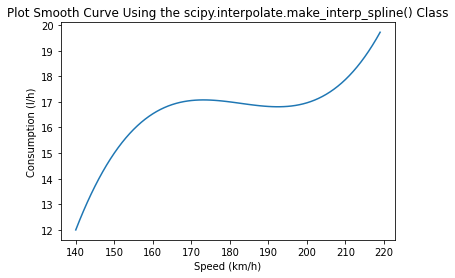

In [2]:

X_Y_Spline = make_interp_spline(spd, consu)
 
# Returns evenly spaced numbers
# over a specified interval.
spd_ = np.arange(spd.min(), spd.max(), 1)
consu_ = X_Y_Spline(spd_)

plt.plot(spd_, consu_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("Speed (km/h)")
plt.ylabel("Consumption (l/h)")
plt.show()

In [10]:
import pandas as pd
spd_consu = list(zip(spd_, consu_))
d = pd.DataFrame(spd_consu, columns=['Speed', 'Consumption'])
print(d)

    Speed  Consumption
0     140    12.000000
1     141    12.378616
2     142    12.738571
3     143    13.080313
4     144    13.404286
..    ...          ...
75    215    18.757812
76    216    18.975714
77    217    19.208437
78    218    19.456429
79    219    19.720134

[80 rows x 2 columns]


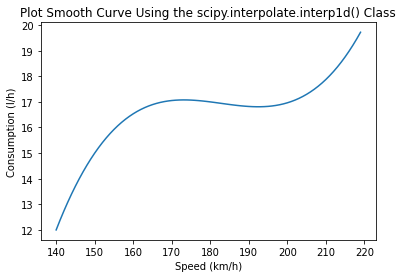

In [4]:
cubic_interploation_model = interp1d(spd, consu, kind = "cubic")
# TODO : ajouter la formule mathématique
# Returns evenly spaced numbers
# over a specified interval.
spd_ = np.arange(spd.min(), spd.max(), 1)
consu_ = cubic_interploation_model(spd_)

plt.plot(spd_, consu_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d() Class")
plt.xlabel("Speed (km/h)")
plt.ylabel("Consumption (l/h)")
plt.show()

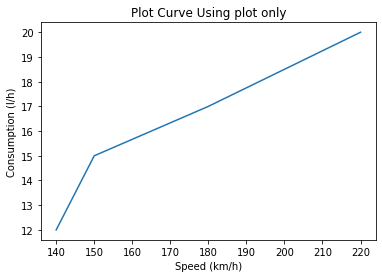

In [5]:
plt.plot(spd, consu)
plt.title("Plot Curve Using plot only")
plt.xlabel("Speed (km/h)")
plt.ylabel("Consumption (l/h)")
plt.show()